In [6]:
import sys
import os
import matplotlib.pyplot as plt 
import numpy as np 
import rt1plotpy

sys.path.insert(0,os.pardir)

%load_ext autoreload
%autoreload 2   

sys.path.insert(0,os.pardir) # パス検索の優先度を親ディレクトリにする．
import rt1raytrace
from  debug_init  import * 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


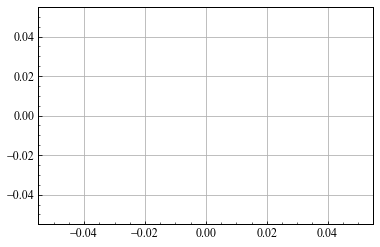

In [7]:
plt.plot([0])

DXF version: AC1021
num of lines:  13
num of circs:  0
num of arcs :  11
DXF version: AC1021
num of lines:  173
num of circs:  0
num of arcs :  45


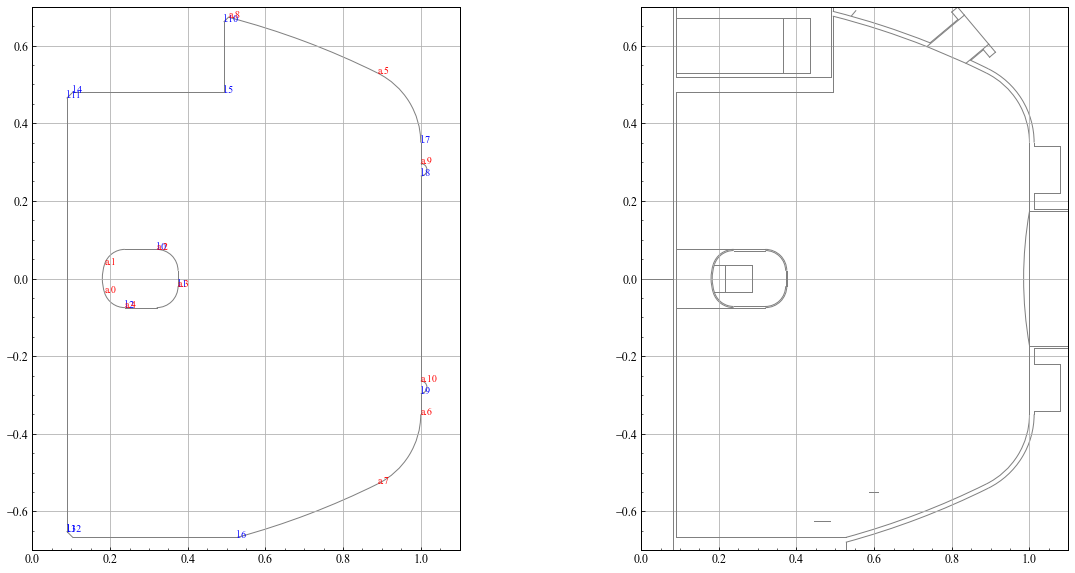

In [8]:
RT1_frame = rt1plotpy.Frame(dxf_file='..\\dxf_files\\simplest4.dxf')
RT1_frame_detail = rt1plotpy.Frame(dxf_file='..\\dxf_files\\main.dxf')
    
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].set(**rt1_ax_kwargs)
ax[1].set(**rt1_ax_kwargs)
RT1_frame.append_frame(ax[0],label=True)
RT1_frame_detail.append_frame(ax[1])

In [56]:
focal_length =6.3e-3 #[m]
h_length, w_length = 3.73e-3,4.968e-3 #[m]
h_num   , w_num    = 270,360    
h_ang0  , w_ang0    =  -1.6, 23.6 #[deg]'..\\dxf_files\\simplest0.dxf'
Z0,Phi0, R0 =  -0.00 ,0.0, 1.18

RT1_ray = rt1raytrace.Raytrace(dxf_file='..\\dxf_files\\simplest4.dxf')
RT1_ray.set_camera( focal_length =  focal_length        ,
                    image_size    = (h_length, w_length),
                    image_shape   = (h_num   , w_num)   ,
                    location      = (Z0      , Phi0, R0)      ,
                    center_angles = (h_ang0  , w_ang0)  ,
                    rotation      =  -0.3)
                 
N = 3
Lnum = [51,50,50,100]
RT1_ray.main2(N=N,Lmax=3, Lnum=Lnum)

you have to "set_camera()" or "set_angles()" next.

### start 1st raytrace ###


calculating Arcs : 100%|██████████| 11/11 [00:17<00:00,  1.56s/it]


-0.15095000000000003 0.0260301433573376


calculating Arcs : 100%|██████████| 11/11 [00:16<00:00,  1.52s/it]


0.029390200000000033 0.016848894438701602


calculating Arcs : 100%|██████████| 11/11 [00:20<00:00,  1.90s/it]


0.0005878040000000251 0.00034575481203599854

### start 2nd raytrace ###


calculating Arcs : 100%|██████████| 11/11 [00:20<00:00,  1.83s/it]


-0.6436428571428572 0.39273209578645085


calculating Arcs : 100%|██████████| 11/11 [00:20<00:00,  1.83s/it]


0.029977509371095445 0.017344522395997233


calculating Arcs : 100%|██████████| 11/11 [00:20<00:00,  1.82s/it]


0.0006117859055327912 0.0003609004993878249

### start 3rd raytrace ###


calculating Arcs : 100%|██████████| 11/11 [00:19<00:00,  1.74s/it]


!WARNING!, there are rays without intersection.
-0.03160204081632653 0.481161045503561


calculating Arcs : 100%|██████████| 11/11 [00:20<00:00,  1.85s/it]


!WARNING!, there are rays without intersection.
0.029977509371095445 0.01739946275521035


calculating Arcs : 100%|██████████| 11/11 [00:19<00:00,  1.82s/it]


!WARNING!, there are rays without intersection.
0.0006117859055327912 0.0003611939174249875


alpha 1.0
alpha 1.0
alpha 1.0
alpha 1.0
alpha 1.0


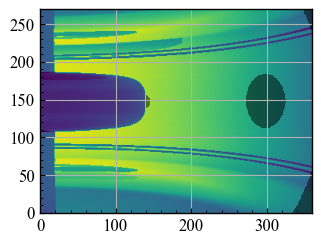

In [59]:
from PIL import Image, ImageDraw, ImageFont

view = RT1_ray.rays[1].Length+ RT1_ray.rays[2].Length

fig, ax = plt.subplots(figsize=(view.shape[1]/100, view.shape[0]/100),dpi=100)  
offset =5

cir1 = rt1raytrace.rt1raytrace.Circle(
    rφz_center=(0.99155, (90+offset)*np.pi/180,0.),
    radius= 0.2594/2,)


cir2 = rt1raytrace.rt1raytrace.Circle(
    rφz_center=(0.99155, (offset)*np.pi/180,0.),
    radius= 0.2594/2,)

is_cir2 = cir2.is_in_circle(RT1_ray.rays[1])


cir3 = rt1raytrace.rt1raytrace.Circle(
    rφz_center=(1.1585+0.001, (offset)*np.pi/180,0.),
    radius= 0.235/2,)

cir4 = rt1raytrace.rt1raytrace.Circle(
    rφz_center=(1.1585-0.005, (offset)*np.pi/180,0.),
    radius= 0.220/2,)
    
cir5 = rt1raytrace.rt1raytrace.Circle(
    rφz_center=(0.99155, (offset+135)*np.pi/180,0.),
    radius= 0.0974/2,)

is_cir1 = cir1.is_in_circle(RT1_ray.rays[1])
is_cir2 = cir2.is_in_circle(RT1_ray.rays[1])
is_cir3 = cir3.is_in_circle(RT1_ray.rays[0])
#is_cir4 = cir4.is_in_circle(RT1_ray.rays[0])
is_cir5 = cir5.is_in_circle(RT1_ray.rays[1])

ax.imshow(view,origin='lower')

ax.imshow(np.where(is_cir1,1,np.nan),vmax=0,cmap='gray',vmin=0,alpha=0.5,origin='lower')
ax.imshow(np.where(is_cir5,1,np.nan),vmax=0,cmap='gray',vmin=0,alpha=0.5,origin='lower')
ax.imshow(np.where(is_cir2,np.nan,1),vmax=0,cmap='gray',vmin=0,alpha=0.5,origin='lower')
#ax.imshow(np.where(is_cir3,np.nan,1),vmax=0,cmap='gray',vmin=0,alpha=0.5,origin='lower')
#ax.imshow(np.where(is_cir4,np.nan,1),vmax=0,cmap='gray',vmin=0,alpha=0.5,origin='lower')

plt.show()
#ax.axis('off')
fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #この1行を入れる
fig.savefig('hoge.png')


font = ImageFont.truetype("C:\Windows\Fonts\meiryob.ttc", 12) # フォントの指定 メイリオ 20
img = Image.open('hoge.png') # load png file
draw = ImageDraw.Draw(img) 
draw.text((10,0),'fl: '+str(RT1_ray.focal_length*1000)[:5] , fill=(255, 255, 255), font=font) # add file name into the picture 
draw.text((10,20),'loc: '+str(RT1_ray.location), fill=(255, 255, 255), font=font) #add 5% value
draw.text((10,40),'c_ang: '+str(RT1_ray.center_angles), fill=(255, 255, 255), font=font) #add 5% value
draw.text((10,60),'rot: '+str(RT1_ray.rotation), fill=(255, 255, 255), font=font) #add 5% value
draw.text((10,80),'offset: '+str(offset), fill=(255, 255, 255), font=font) #add 5% value
#draw.text((10,60),'95%: '+str(percentile_95), fill=(255, 255, 255), font=font) #add 95% value
img.save('hoge.png')

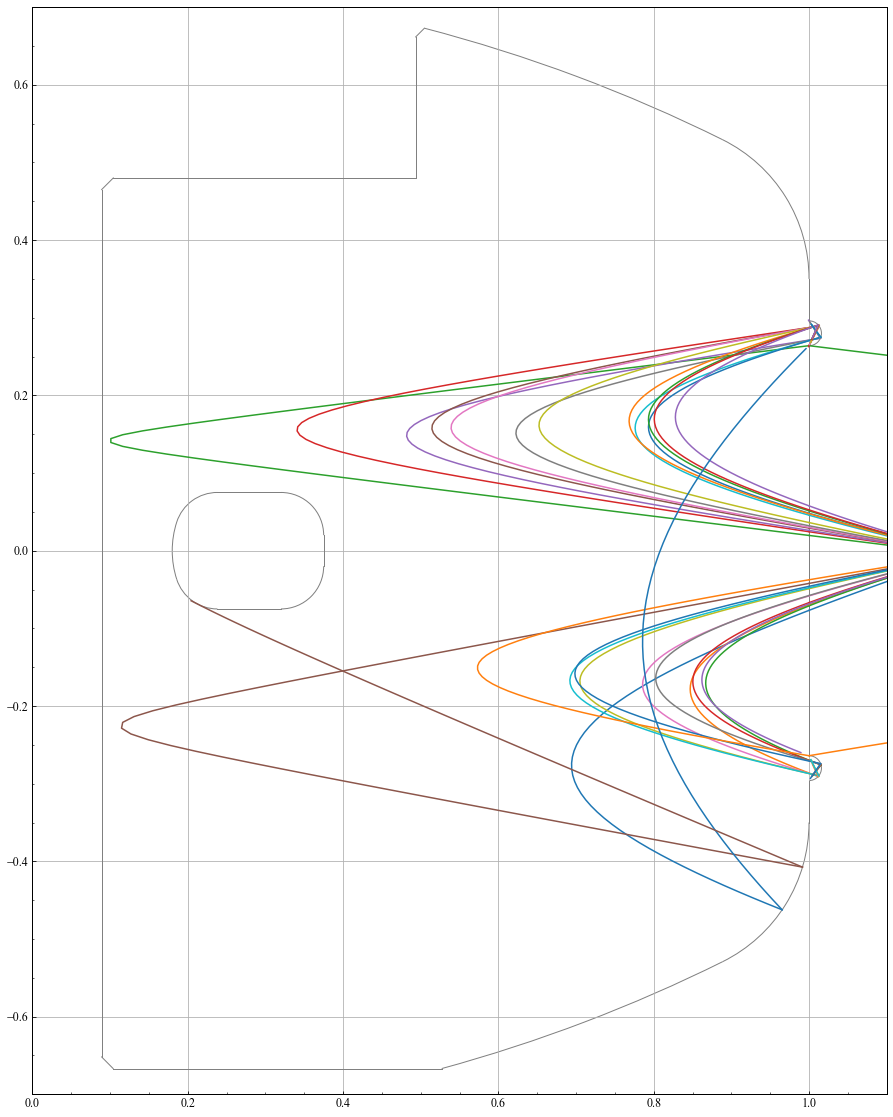

In [17]:
%matplotlib inline
fig,ax = plt.subplots(figsize=(20,20))

hoge = RT1_ray.rays[2].ref_type==-1

RT1_ray.append_frame(ax)
ax.set(**rt1_ax_kwargs)
for n in range(N):
    R,Z=RT1_ray.rays[n].RZ_ray(Lnum=50)
    R = R[:,hoge]
    Z = Z[:,hoge]
    for i in range(R.shape[1]):
        ax.plot(R[:,i],Z[:,i],color=cycle(int(i%10)))

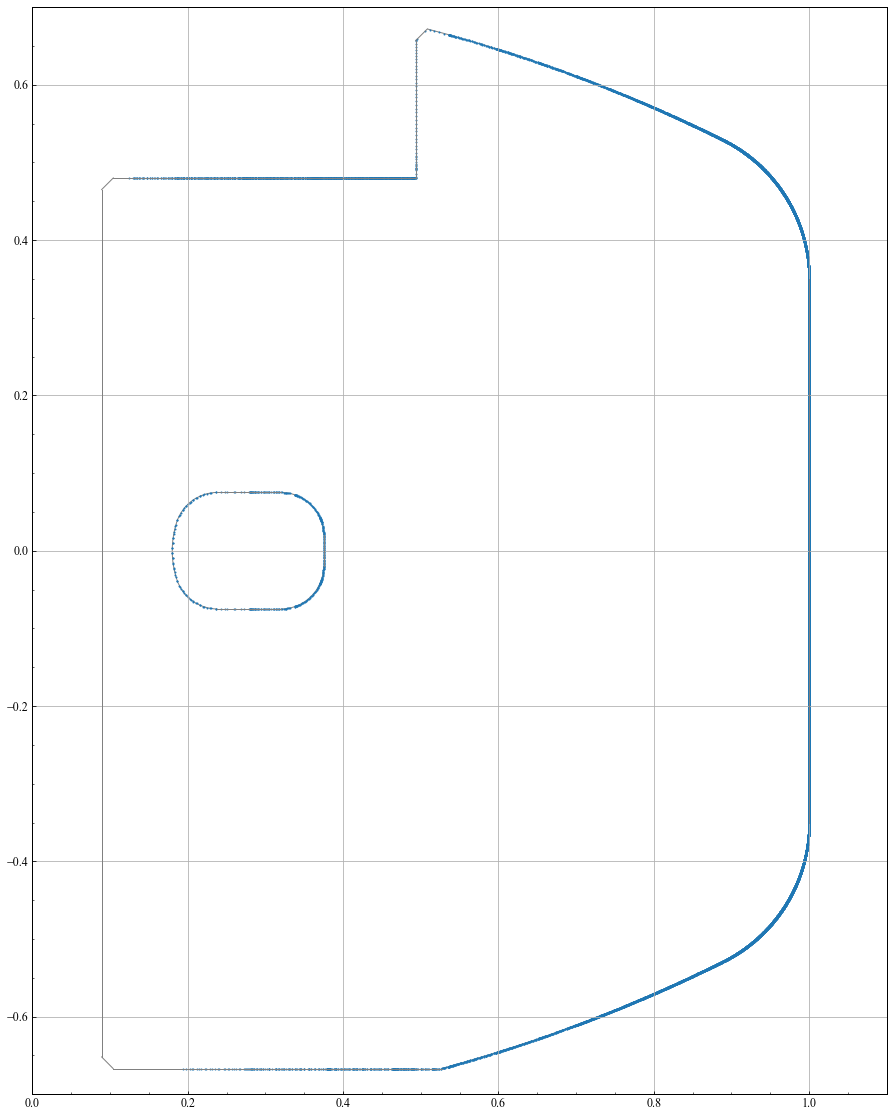

In [8]:
ray = RT1_ray.rays[2]
fig,ax = plt.subplots(figsize=(20,20))
rt1_ax_kwargs = {'xlim'  :(0,1.1),
                'ylim'  :(-0.7,0.7), 
                'aspect': 'equal'
                }
RT1_ray.append_frame(ax)
ax.set(**rt1_ax_kwargs)
R_1st,Z_1st = ray.RZ_ray(Lmax=ray.Length)

ax.scatter(R_1st.flatten(),Z_1st.flatten(),s=1,)
plt.show()

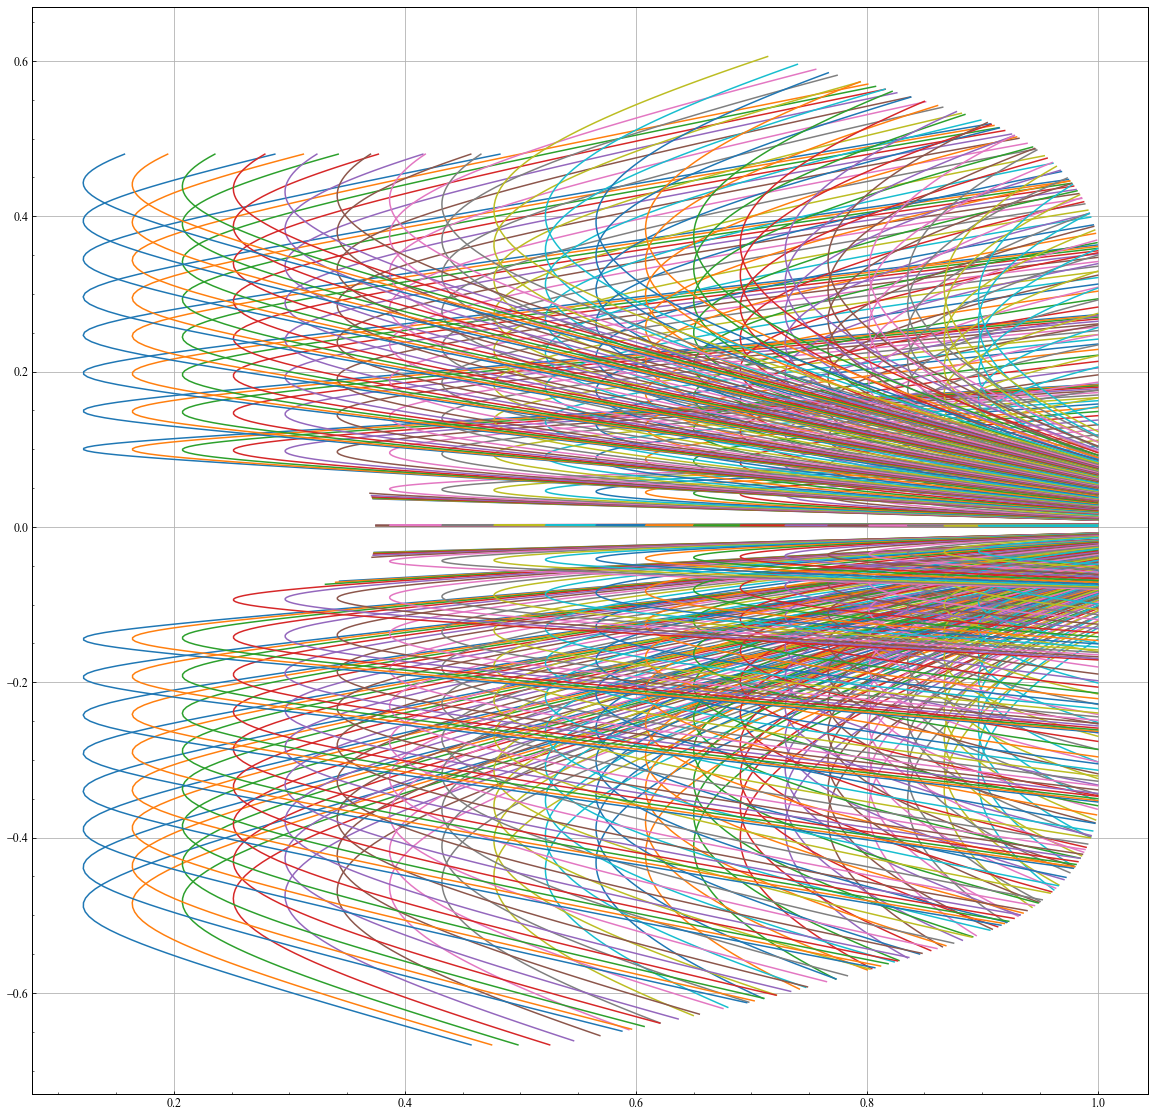

In [12]:
R,Z = RT1_ray.rays[1].RZ_ray(100)

plt.figure(figsize=(20,20))
for i in range(0,200,10):
    for j in range(0,200,10):
        plt.plot(R[:,i,j],Z[:,i,j])

FileNotFoundError: [Errno 2] No such file or directory: 'model\\Raytrace_test-20220714.png'

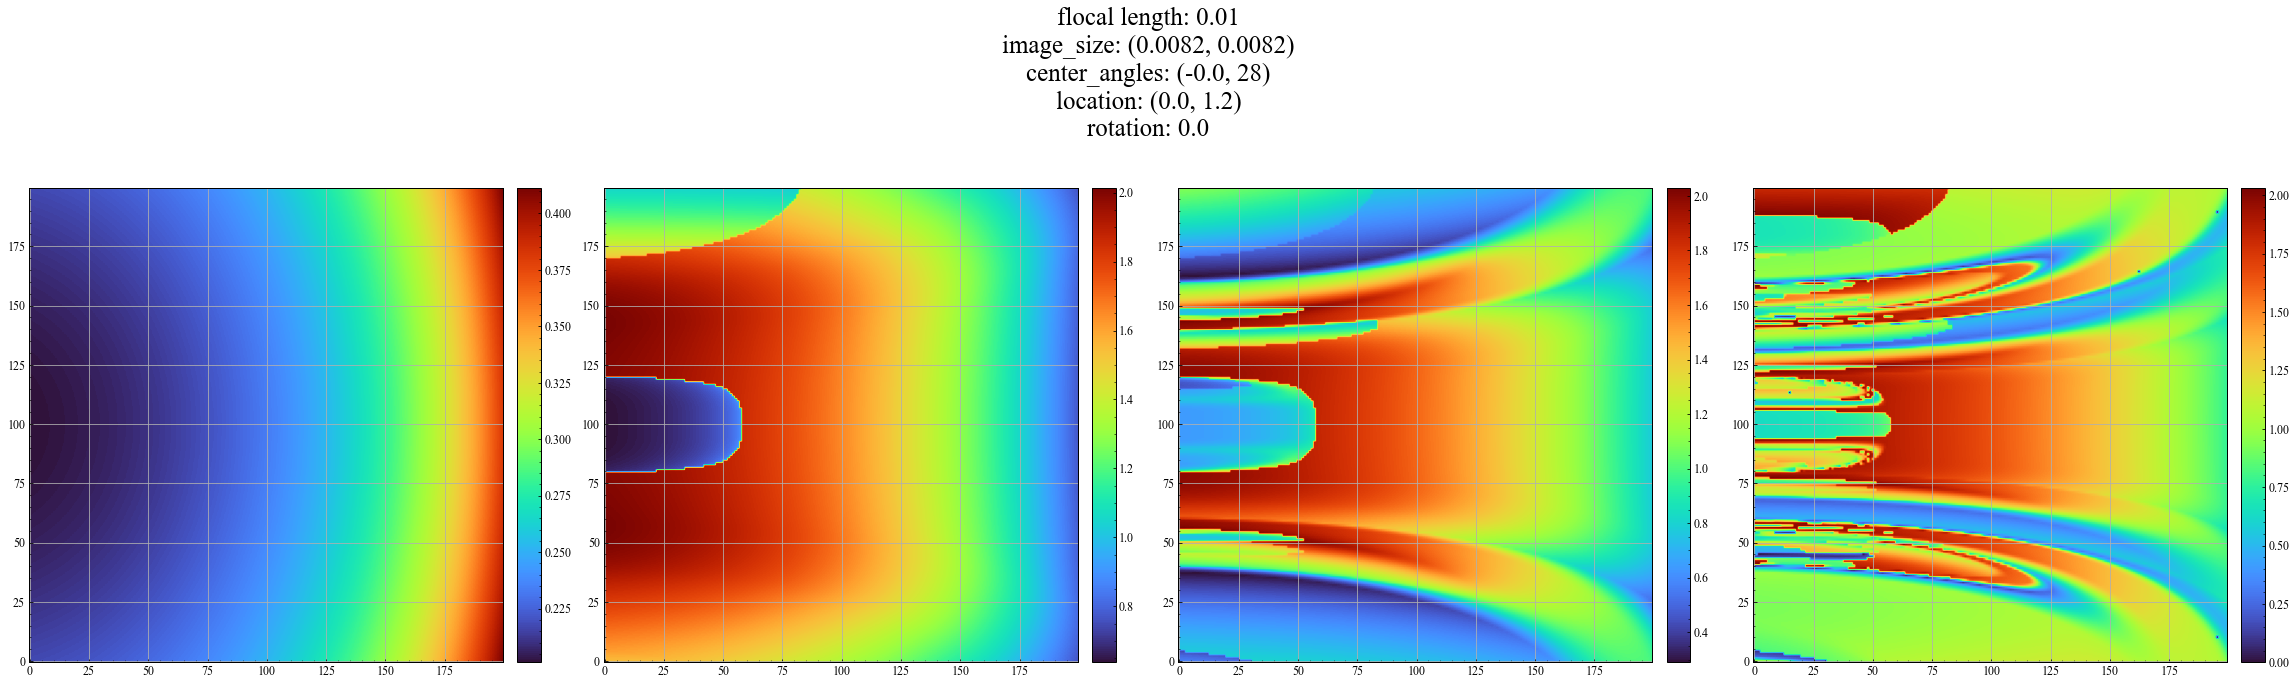

In [10]:
RT1_ray.save_model(path='model\\',name='test-20220714')